<a href="https://colab.research.google.com/github/vandien201462C/week5/blob/main/conlacnguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=9d7cedab5020057f92bcc98c9b172c51d323a2571bb280220802006e2e93ea58
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


55.95225280535148


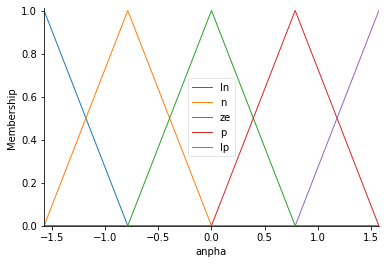

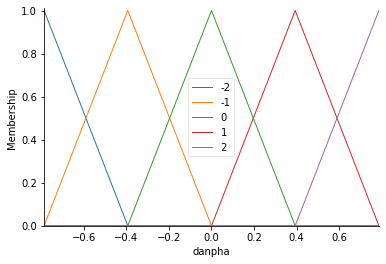

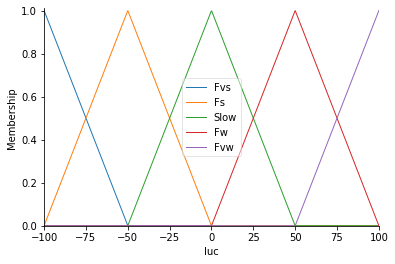

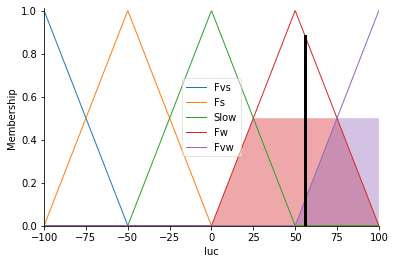

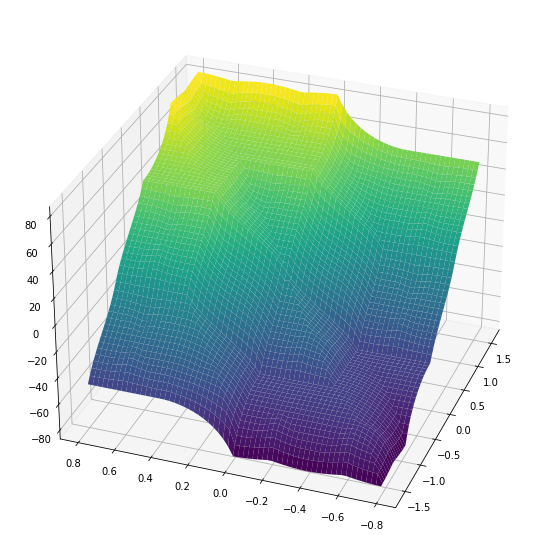

In [ ]:
#con lac nguoc

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universea = np.linspace(-np.pi/2,np.pi/2,61)
universeda = np.linspace(-np.pi/4,np.pi/4,61)
universe1 = np.linspace(-100,100,1000)
#Input
a=ctrl.Antecedent(universea,'anpha')
da=ctrl.Antecedent(universeda,'danpha')
#Output
F=ctrl.Consequent(universe1,'luc')

namea=['ln','n','ze','p','lp']
nameda=['-2','-1','0','1','2']
namesT=['Fvs','Fs','Slow','Fw','Fvw']

a.automf(names=namea)
da.automf(names=nameda)
F.automf(names=namesT)

a.view()
da.view()
F.view()

rule = []

rule.append(ctrl.Rule(antecedent=((a['ln'] & da['-2'])|(a['ln'] & da['-1'])|(a['ln'] & da['0'])|
                                  (a['n'] & da['-2'])),consequent=F['Fvs'],label='rule Fvs'))
rule.append(ctrl.Rule(antecedent=((a['ze'] & da['-2'])|(a['n'] & da['-1'])|(a['ze'] & da['-1'])|
                                  (a['n'] & da['0'])|(a['ln'] & da['1'])|(a['ln'] & da['2'])),consequent=F['Fs'],label='rule Fs'))
rule.append(ctrl.Rule(antecedent=((a['p'] & da['-2'])|(a['p'] & da['-1'])|(a['ze'] & da['0'])|
                                  (a['n'] & da['1'])|(a['n'] & da['2'])),consequent=F['Slow'],label='rule Slow'))
rule.append(ctrl.Rule(antecedent=((a['lp'] & da['-2'])|(a['lp'] & da['-1'])|(a['p'] & da['0'])|
                                  (a['p'] & da['1'])|(a['ze'] & da['1'])|(a['ze'] & da['2'])),consequent=F['Fw'],label='rule Fw'))
rule.append(ctrl.Rule(antecedent=((a['lp'] & da['0'])|(a['lp'] & da['1'])|(a['lp'] & da['2'])|(a['p'] & da['2'])),consequent=F['Fvw'],label='rule Fvw'))
#Control system
F_ctrl = ctrl.ControlSystem(rule)
Force_sim=ctrl.ControlSystemSimulation(F_ctrl)

Force_sim.input['anpha'] = np.pi/8
Force_sim.input['danpha'] = 1
Force_sim.compute()
print(Force_sim.output['luc'])
F.view(sim = Force_sim)
# vẽ 3d 
d_ctrl = ctrl.ControlSystem(rule)
d_simulation=ctrl.ControlSystemSimulation(d_ctrl)
upsampled1=np.linspace(-np.pi/2,np.pi/2,61)
upsampled2=np.linspace(-np.pi/4,np.pi/4,61)
x,y = np.meshgrid(upsampled1,upsampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    d_simulation.input['anpha']=x[i,j]
    d_simulation.input['danpha']=y[i,j]
    d_simulation.compute()
    z[i,j]=d_simulation.output['luc']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
ax.view_init(30,200)